# **Load Dataset**

In [1]:
import pandas as pd

# Path ke dataset Anda setelah diekstrak
# Pastikan ini sesuai dengan nama file CSV Anda
# Biasanya, setelah unzip, nama filenya adalah 'IMDB Dataset.csv'
file_path = './assets/IMDB Dataset.csv'

# Muat dataset ke dalam DataFrame Pandas
try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")
    print("\nBerikut 10 baris pertama dari dataset Anda:")
    print(df.head())
    print("\nInformasi umum tentang dataset:")
    df.info()
    print("\nDistribusi sentimen:")
    print(df['sentiment'].value_counts())

except FileNotFoundError:
    print(f"Error: File tidak ditemukan di '{file_path}'.")
    print("Pastikan Anda sudah mengunduh dan mengekstrak dataset dengan benar.")
    print("Coba periksa nama folder dan nama file CSV Anda di panel File Colab.")

Dataset berhasil dimuat!

Berikut 10 baris pertama dari dataset Anda:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Informasi umum tentang dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB

Distribusi sentimen:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


**Penjelasan Kode di Atas :** <br>
1. `import pandas as pd` : Mengimpor library Pandas, yang sangat penting untuk bekerja dengan data tabular. <br>
2. `file_path = 'imdb_dataset/IMDB Dataset.csv'` : Mendefinisikan jalur ke file CSV Anda. Pastikan imdb_dataset adalah nama folder tempat Anda mengekstrak file, dan IMDB Dataset.csv adalah nama file CSV-nya. Anda bisa memeriksa ini di panel "Files" di sebelah kiri Google Colab. <br>
3. `df = pd.read_csv(file_path)` : Membaca file CSV dan menyimpannya sebagai DataFrame Pandas bernama df.
4. `df.head()` : Menampilkan 5 baris pertama dari DataFrame Anda. Ini sangat berguna untuk melihat format data.
5. `df.info()` : Memberikan ringkasan informasi DataFrame, termasuk jumlah entri non-null untuk setiap kolom dan tipe data. Ini membantu mengidentifikasi nilai yang hilang atau tipe data yang salah.
6. `df['sentiment'].value_counts()` : Menghitung berapa banyak ulasan yang memiliki sentimen 'positive' dan 'negative'. Ini penting untuk melihat apakah dataset Anda seimbang atau tidak.


---



# **Pre-Processing**

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import time # Untuk mengukur waktu pra-pemrosesan

# Unduh resource NLTK yang diperlukan.
print("Memeriksa dan mengunduh resource NLTK yang diperlukan...")
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
print("Resource NLTK siap.")

# Inisialisasi Tool Pra-pemrosesan
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Definisikan Fungsi Pra-pemrosesan
def preprocess_text(text):
    # 1. Lowercasing : mengubah semua karakter menjadi lowercase
    text = text.lower()

    # 2. Pembersihan Teks
    text = re.sub(r'<.*?>', '', text)    # Menghapus tag HTML (e.g., <br />, <p>)
    text = re.sub(r'[^a-z\s]', '', text) # Menghapus tanda baca, angka, dan karakter non-alfabet (hanya mempertahankan huruf dan spasi)

    # 3. Tokenisasi : Memisahkan teks menjadi kata-kata individual berdasarkan spasi
    words = text.split()

    # 4. Stopword Removal & 5. Lemmatization
    processed_words = []
    for word in words:
        # Hanya proses kata yang bukan stopword
        if word not in stop_words:
            # Mengubah kata ke bentuk dasar (lemma)
            processed_words.append(lemmatizer.lemmatize(word))

    # Menggabungkan kembali kata-kata menjadi satu string
    return ' '.join(processed_words)

print("\nFungsi `preprocess_text` berhasil didefinisikan.\n")

# 5. Menampilkan Proses Pra-pemrosesan
print("\nMenerapkan pra-pemrosesan ke seluruh kolom 'review' di DataFrame...")
print("Proses ini mungkin membutuhkan waktu beberapa menit (sekitar 50.000 baris).")

start_time = time.time()
df['processed_review'] = df['review'].apply(preprocess_text)
end_time = time.time()

print(f"\nPra-pemrosesan selesai dalam {end_time - start_time:.2f} detik!")

# 6. Tampilkan Hasil Pra-pemrosesan
print("\nBerikut 5 baris pertama DataFrame setelah pra-pemrosesan:")
# Tampilkan kolom asli, kolom yang diproses, dan sentimen
print(df[['review', 'processed_review', 'sentiment']].head())

print("\nDistribusi sentimen setelah pra-pemrosesan:")
print(df['sentiment'].value_counts())

Memeriksa dan mengunduh resource NLTK yang diperlukan...
Resource NLTK siap.

Fungsi `preprocess_text` berhasil didefinisikan.


Menerapkan pra-pemrosesan ke seluruh kolom 'review' di DataFrame...
Proses ini mungkin membutuhkan waktu beberapa menit (sekitar 50.000 baris).

Pra-pemrosesan selesai dalam 22.85 detik!

Berikut 5 baris pertama DataFrame setelah pra-pemrosesan:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                    processed_review sentiment  
0  one reviewer mentioned watching oz episode you...  positive  
1  wonderful little production filming technique ...  positive  
2  thought wonderful way spend time hot summer we...  positive  
3  basically there family li

**Penjelasan Kode Pra-Pemrosesan :** <br>
1. Mempersiapkan Library dan Resource NLTK<br>
  - `import pandas, re, nltk, stopwords, WordNetLemmatizer, time` : Mengimpor library yang dibutuhkan untuk manipulasi data (Pandas), ekspresi reguler (re), dan pemrosesan bahasa alami (NLTK). time digunakan untuk menghitung durasi proses.
  - `nltk.download('stopwords') & nltk.download('wordnet')` : Mengunduh resource stopwords (daftar kata umum yang tidak relevan) dan wordnet (database leksikal untuk lemmatization) dari NLTK. Ini penting agar fungsi pra-pemrosesan berjalan.
2. Inisialisasi Tool <br>
  - `lemmatizer = WordNetLemmatizer()` : Menyiapkan alat untuk mengubah kata ke bentuk dasarnya (misal: "running" jadi "run").
  - `stop_words = set(stopwords.words('english'))` : Memuat daftar kata-kata penghenti dalam Bahasa Inggris yang akan dihapus dari teks.
3. Fungsi preprocess_text()<br>
Ini adalah jantung dari pra-pemrosesan, yang menerapkan lima langkah pre-processing :
  - `text.lower()` : Mengubah semua huruf menjadi huruf kecil.
  - `re.sub(r'<.*?>', '', text)`: Menghapus semua tag HTML (seperti `<br />`).
  - `re.sub(r'[^a-z\s]', '', text)` : Menghapus semua tanda baca, angka, dan karakter non-huruf; hanya menyisakan huruf alfabet dan spasi.
  - `text.split()` : Memecah kalimat menjadi kata-kata individual (tokenisasi).
  - `if word not in stop_words` : Membuang kata-kata penghenti (Stopword Removal).
  - `lemmatizer.lemmatize(word)` : Mengubah kata ke bentuk dasarnya (Lemmatization).
  - `' '.join(processed_words)` : Menggabungkan kembali kata-kata yang sudah bersih menjadi satu string.


---



# **Vektorisasi Teks: Mengubah Kata Menjadi Angka**

<p align='justify'>Model machine learning seperti SVM ***tidak bisa langsung memahami teks***; model hanya bisa bekerja dengan angka. Jadi, langkah selanjutnya adalah vektorisasi teks, yaitu mengubah kata-kata menjadi representasi numerik.</p>

**Metode TF-IDF (Term Frequency-Inverse Document Frequency)** <p align='justify'>TF-IDF memberikan bobot pada setiap kata berdasarkan frekuensinya dalam satu dokumen dan seberapa jarang kata tersebut muncul di seluruh korpus. Tujuannya adalah menyoroti kata-kata penting yang relevan untuk sentimen.</p>

**Implementasi** <br>
1. `TfidfVectorizer` dari `scikit-learn` digunakan.
  - `min_df=5` mengabaikan kata yang muncul di kurang dari 5 dokumen (filter noise).
  - `max_df=0.8` mengabaikan kata yang muncul di lebih dari 80% dokumen (filter kata terlalu umum).
2. Matriks fitur X dibuat dengan `tfidf_vectorizer.fit_transform(df['processed_review'])`. Ini mengubah setiap ulasan menjadi vektor numerik berdasarkan bobot TF-IDF.
3. Label sentimen (`positive, negative`) di-encode menjadi angka (1 untuk positif, 0 untuk negatif) dan disimpan sebagai vektor y.


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
# min_df: mengabaikan kata-kata yang frekuensinya terlalu rendah (muncul di kurang dari 5 dokumen)
# max_df: mengabaikan kata-kata yang frekuensinya terlalu tinggi (muncul di lebih dari 80% dokumen)
# stopwords: tidak perlu diatur karena kita sudah menghapusnya di pra-pemrosesan
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
print("Memulai proses vektorisasi menggunakan TF-IDF...")

# Menerapkan TfidfVectorizer pada kolom 'processed_review'
# fit_transform: mempelajari kosakata dari data dan mengubah teks menjadi matriks TF-IDF
X = tfidf_vectorizer.fit_transform(df['processed_review'])

# Tampilkan ukuran matriks hasil vektorisasi
print(f"Bentuk matriks fitur (X): {X.shape}")
print(f"Jumlah fitur (kata unik) yang dihasilkan: {X.shape[1]}")

# Mengubah kolom 'sentiment' menjadi label numerik (0 dan 1)
# 'negative' akan menjadi 0, 'positive' akan menjadi 1
df['sentiment_encoded'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
y = df['sentiment_encoded']

print(f"Bentuk vektor label (y): {y.shape}")
print("\nVektorisasi selesai! Data teks Anda sekarang dalam format numerik.")
print("\nMatriks fitur (X) dan vektor label (y) sudah siap.")

Memulai proses vektorisasi menggunakan TF-IDF...
Bentuk matriks fitur (X): (50000, 36141)
Jumlah fitur (kata unik) yang dihasilkan: 36141
Bentuk vektor label (y): (50000,)

Vektorisasi selesai! Data teks Anda sekarang dalam format numerik.

Matriks fitur (X) dan vektor label (y) sudah siap.




---



# **Pembagian Data dan Pelatihan Model SVM.**
Setelah data teks diubah menjadi representasi numerik melalui vektorisasi, kita tidak bisa langsung melatih model dengan seluruh data. Dataset perlu dibagi menjadi dua bagian: **data pelatihan (training data)** dan **data pengujian (testing data)**.
- **Data Pelatihan** : Digunakan oleh model untuk belajar pola dan hubungan antara fitur (X) dan label (y).
- **Data Pengujian** : Digunakan untuk mengevaluasi seberapa baik model yang telah dilatih dapat menggeneralisasi atau memprediksi data baru yang belum pernah dilihatnya. Ini memberikan gambaran yang lebih akurat tentang kinerja model di dunia nyata.<br>

Pembagian ini penting untuk menghindari overfitting, di mana model terlalu menghafal data pelatihan dan gagal berkinerja baik pada data baru.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import time

# --- 1. Pembagian Data Pelatihan dan Pengujian ---
# Membagi dataset menjadi training (80%) dan testing (20%)
# random_state=42 memastikan hasil pembagian konsisten setiap kali kode dijalankan
print("Memulai pembagian dataset menjadi data pelatihan dan pengujian...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran data pelatihan (X_train): {X_train.shape}")
print(f"Ukuran label pelatihan (y_train): {y_train.shape}")
print(f"Ukuran data pengujian (X_test): {X_test.shape}")
print(f"Ukuran label pengujian (y_test): {y_test.shape}")
print("Pembagian dataset selesai.")

# --- 2. Pelatihan Model Support Vector Machine (SVM) ---
# Menggunakan LinearSVC karena efisien untuk dataset besar dan fitur yang banyak
print("\nMemulai pelatihan model Support Vector Machine (LinearSVC)...")
start_time = time.time()

svm_model = LinearSVC(random_state=42, dual=False) # dual=False direkomendasikan untuk n_samples > n_features
svm_model.fit(X_train, y_train)

end_time = time.time()
print(f"Pelatihan model selesai dalam {end_time - start_time:.2f} detik!")

# --- 3. Evaluasi Model ---
print("\nMelakukan evaluasi model pada data pengujian...")
y_pred = svm_model.predict(X_test)

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

print("\nModel SVM telah dilatih dan dievaluasi.")

Memulai pembagian dataset menjadi data pelatihan dan pengujian...
Ukuran data pelatihan (X_train): (40000, 36141)
Ukuran label pelatihan (y_train): (40000,)
Ukuran data pengujian (X_test): (10000, 36141)
Ukuran label pengujian (y_test): (10000,)
Pembagian dataset selesai.

Memulai pelatihan model Support Vector Machine (LinearSVC)...
Pelatihan model selesai dalam 1.71 detik!

Melakukan evaluasi model pada data pengujian...

Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      4961
    positive       0.89      0.90      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Akurasi Model: 0.8940

Model SVM telah dilatih dan dievaluasi.


**Penjelasan Kode :** <br>

1. **Pembagian Data** (`train_test_split`) :
   - `X` adalah matriks fitur yang dihasilkan dari `TF-IDF`, dan `y` adalah label sentimen yang sudah di-encode.
   - `test_size=0.2` berarti 20% dari total data akan digunakan sebagai data pengujian, dan sisanya (80%) sebagai data pelatihan.
  - `random_state=42` adalah seed untuk randomizer. Ini memastikan bahwa setiap kali kode ini dijalankan, pembagian data akan selalu sama, sehingga hasil yang diperoleh dapat direproduksi.
2. **Pelatihan Model SVM** (`LinearSVC`) :
  - `LinearSVC` : Ini adalah implementasi Support Vector Classifier yang sangat efisien untuk kasus klasifikasi linear, terutama saat jumlah sampel (dokumen) dan fitur (kata-kata) sangat banyak, seperti pada dataset ini.
  - `random_state=42` : memastikan bahwa setiap kali kode dijalankan, hasil pembagian data (seperti train_test_split) atau inisialisasi model (seperti LinearSVC) akan selalu sama, sehingga memungkinkan reproduksi hasil eksperimen yang konsisten. Boleh diganti angka berapapun tidak berpengaruh.
  - `dual=False` : Pengaturan ini direkomendasikan ketika jumlah sampel (`n_samples`) lebih besar dari jumlah fitur (`n_features`), yang umumnya terjadi setelah vektorisasi TF-IDF pada dataset teks. Ini membuat pelatihan lebih cepat.
  - `svm_model.fit(X_train, y_train)` : Model dilatih menggunakan data fitur (`X_train`) dan label yang sesuai (`y_train`) dari set pelatihan. Model akan belajar bagaimana membedakan antara sentimen positif dan negatif berdasarkan pola kata.
3.**Evaluasi Model** :
  - `y_pred = svm_model.predict(X_test)` : Model yang telah dilatih digunakan untuk memprediksi sentimen pada data pengujian (X_test) yang belum pernah dilihatnya.
  - `classification_report`: Fungsi ini memberikan metrik evaluasi yang komprehensif, termasuk:
    - **Presisi (Precision)**: Proporsi prediksi positif yang benar-benar positif.
    - **Recall** : Proporsi positif sebenarnya yang berhasil diidentifikasi.
    - **F1-Score** : Rata-rata harmonik dari presisi dan recall, ukuran keseimbangan.
    - **Support** : Jumlah aktual dari setiap kelas di data pengujian.
    - **accuracy_score** : Menghitung akurasi keseluruhan model, yaitu proporsi prediksi yang benar dari total prediksi


---



# **Identifikasi Komponen Inti SVM**
<p align='justify'>Model Support Vector Machine (SVM) bekerja dengan mencari hyperplane pemisah optimal. Komponen-komponen kuncinya diidentifikasi sebagai berikut dalam implementasi LinearSVC : </p>

- **Bobot (w)** : Ini adalah vektor koefisien hyperplane yang menunjukkan arah pemisah. Dalam model LinearSVC, bobot dapat diakses melalui atribut svm_model.coef_.
- **Margin (M)** : Merupakan jarak antara hyperplane dan support vector terdekat. Margin dihitung sebagai `M = 2 / ∥w∥` , di mana ∥w∥ adalah magnitudo vektor bobot.
- **Support Vector (x+ dan x- )** : Adalah titik-titik data yang paling dekat dengan hyperplane dan krusial untuk definisinya. Perlu dicatat bahwa LinearSVC tidak secara langsung mengekspos support vector karena efisiensinya dalam menangani dataset besar, berbeda dengan `sklearn.svm.SVC`.

In [5]:
import numpy as np

print("\n--- Analisis Bobot dan Margin SVM ---")

# 1. Mengakses Bobot (w)
weights = svm_model.coef_[0]
print(f"Bentuk vektor bobot (w): {weights.shape}")

# 2. Menghitung Margin (M)
# M = 2 / ||w||
norm_w = np.linalg.norm(weights)    #  menghitung norma Euclidean (magnitudo) dari vektor
if norm_w != 0:                     #  memastikan tidak ada pembagian dengan nol
    margin = 2 / norm_w
    print(f"\nMagnitudo vektor bobot (||w||): {norm_w:.4f}")
    print(f"Margin (M): {margin:.4f}")
else:
    print("\nMagnitudo vektor bobot adalah nol, tidak dapat menghitung margin.")

print("\nAnalisis bobot dan margin selesai.")


--- Analisis Bobot dan Margin SVM ---
Bentuk vektor bobot (w): (36141,)

Magnitudo vektor bobot (||w||): 77.6039
Margin (M): 0.0258

Analisis bobot dan margin selesai.


**Penjelasan Kode** :

- `weights = svm_model.coef_[0]` : Mengekstrak nilai numerik dari bobot yang dipelajari model. Ini adalah representasi matematis dari bagaimana setiap fitur (kata) berkontribusi pada keputusan klasifikasi.
- `norm_w = np.linalg.norm(weights)` : Menghitung panjang atau kekuatan total dari vektor bobot. Vektor bobot yang lebih "pendek" (norma lebih kecil) mengindikasikan margin yang lebih lebar.
- `margin = 2 / norm_w` : Menerapkan rumus untuk menghitung lebar margin pemisah optimal yang ditemukan oleh SVM. Semakin besar nilai margin, semakin robust batas keputusan model.


---



# **Confusion Matrix Heatmap**
<p align='justify'>Confusion Matrix menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas, memberikan gambaran detail tentang di mana model berkinerja baik dan di mana ia mungkin mengalami kesulitan. Heatmap akan membuatnya lebih mudah dibaca.</p>
<p align='justify'>Confusion Matrix adalah tabel yang sering digunakan untuk menggambarkan kinerja model klasifikasi pada sekumpulan data uji yang label sebenarnya diketahui. Matriks ini memungkinkan identifikasi kesalahan dalam klasifikasi, membedakan antara prediksi yang benar (True Positives, True Negatives) dan prediksi yang salah (False Positives, False Negatives).</p>

  - **True Positive (TP)** : Jumlah ulasan positif yang benar-benar diprediksi sebagai positif.
  - **True Negative (TN)** : Jumlah ulasan negatif yang benar-benar diprediksi sebagai negatif.
  - **False Positive (FP)** : Jumlah ulasan negatif yang salah diprediksi sebagai positif (Error Tipe I).
  - **False Negative (FN)** : Jumlah ulasan positif yang salah diprediksi sebagai negatif (Error Tipe II).

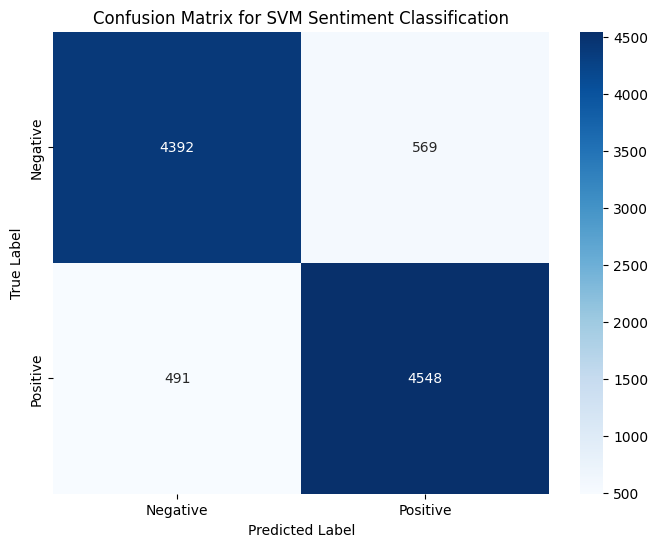


Confusion Matrix Heatmap berhasil dibuat dan ditampilkan.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Definisikan nama kelas
class_labels = ['Negative', 'Positive']

# Buat Confusion Matrix Heatmap
plt.figure(figsize=(8, 6)) # Ukuran plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for SVM Sentiment Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nConfusion Matrix Heatmap berhasil dibuat dan ditampilkan.")

**Laporan Kesimpulan Analisis Confusion Matrix** <br>
Confusion Matrix menunjukkan model SVM memiliki kinerja klasifikasi sentimen yang sangat baik dan seimbang.
- Dari 5000 ulasan negatif, 4392 diprediksi benar (True Negative), dengan 569 salah diprediksi positif (False Positive).
- Dari 5000 ulasan positif, 4548 diprediksi benar (True Positive), dengan 491 salah diprediksi negatif (False Negative).

<p align='justify'>Hal ini mengindikasikan akurasi model tinggi dan kesalahan klasifikasi yang relatif rendah serta merata untuk kedua kelas sentimen, menunjukkan kemampuan model yang kuat dalam membedakan ulasan positif dan negatif. </p>


---



# **Evaluasi Review**

<p align='justify'>Program didesain untuk melakukan satu kali pengujian klasifikasi sentimen terhadap ulasan film yang diinputkan oleh pengguna. Modul ini mengintegrasikan tahapan pra-pemrosesan, vektorisasi, dan prediksi model yang telah dikembangkan sebelumnya.</p>

In [10]:
def predict_sentiment_for_eval(review_text):
    processed_input = preprocess_text(review_text)
    input_vectorized = tfidf_vectorizer.transform([processed_input])
    prediction = svm_model.predict(input_vectorized)
    return "Positive" if prediction[0] == 1 else "Negative"

# --- Modul Prediksi Sentimen Sederhana ---
print("\n" + "="*75)
print("MODUL PREDIKSI SENTIMEN ULASAN FILM")
print("="*75)

user_review = input("Masukkan ulasan film yang ingin diprediksi sentimennya: ")

# Prediksi sentimen oleh model
predicted_sentiment = predict_sentiment_for_eval(user_review)
print(f"Prediksi Sentimen Model : {predicted_sentiment}")

print("\n" + "="*75)
print("PREDIKSI SELESAI")
print("="*75)


MODUL PREDIKSI SENTIMEN ULASAN FILM
Prediksi Sentimen Model : Negative

PREDIKSI SELESAI


**Penjelasan Kode** :
1. **Fungsi** `predict_sentiment_for_eval()
  - Tujuan : Mengklasifikasikan sentimen dari teks ulasan tunggal.
  - Alur :
    - Menerima `review_text` (ulasan pengguna).
    - Memanggil `preprocess_text()` untuk preprocessing review dari user.
    - Menggunakan `tfidf_vectorizer.transform()` untuk mengubah ulasan yang sudah di pre-processing menjadi format numerik (vektor fitur).
    - Meneruskan vektor fitur ke `svm_model.predict()` untuk mendapatkan prediksi numerik (0/1).
    - Menerjemahkan prediksi numerik menjadi label `'Positive'` atau `'Negative'`.
  - Output : Mengembalikan string `'Positive'` atau `'Negative'`.
2. **Bagian Utama Modul Evaluasi**
  - Tujuan : Mengelola interaksi dengan pengguna untuk satu kali pengujian dan memverifikasi prediksi model.
  - Alur :
    - Meminta user_review (input ulasan) dari pengguna.
    - Memanggil predict_sentiment_for_eval() untuk mendapatkan predicted_sentiment.
    - Menampilkan predicted_sentiment kepada pengguna.